### Importing packages

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
import scipy.stats as stat
import seaborn as sb
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

### Loading Files

Here we load two files one contains the listings and the other contains the neighbourhoods. We display both files and the number of listings in the original dataset.

In [9]:
listings_file_path = "C://Users//aahmed//Desktop//Airbnb//udacity//project1//airbnboslo//listings.csv"
nh_file_path = "C://Users//aahmed//Desktop//Airbnb//udacity//project1//airbnboslo//neighbourhoods.csv"

listings=pd.read_csv(listings_file_path)
nhoods=pd.read_csv(nh_file_path)
print("Number of Listings:",len(listings))

display(nhoods)
display(listings.head())


Number of Listings: 2889


,neighbourhood_group,neighbourhood
0,NaN,Alna
1,NaN,Bjerke
2,NaN,Frogner
3,NaN,Gamle Oslo
4,NaN,Grorud
5,NaN,Grünerløkka
6,NaN,Marka
7,NaN,Nordre Aker
8,NaN,Nordstrand
9,NaN,Østensjø


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,42932,"Charming apartment, Oslo Center, Ro",187463,Cecilie,NaN,Frogner,59.91234,10.72384,Entire home/apt,1999,3,38,2020-01-13,0.44,1,363
1,71725,Central big room - ap with balcony,368229,Reidun,NaN,Gamle Oslo,59.90611,10.78000,Private room,547,4,50,2020-03-12,0.42,1,299
2,77108,Friendly & spacious in uptown Oslo,412523,Gunn Hild,NaN,Frogner,59.92478,10.71649,Entire home/apt,2299,7,15,2019-12-28,0.13,1,358
3,92103,Trendy Urban Downtown Oslo.,496205,Dorte,NaN,Grünerløkka,59.91975,10.75466,Entire home/apt,1361,3,20,2013-08-18,0.17,1,330
4,149776,Bird's nest in the heart of Oslo,714768,Henrik,NaN,St. Hanshaugen,59.92187,10.74817,Private room,712,5,38,2020-02-13,0.34,2,365


We can also have a look tp the types in our listings dataframe. It contains 16 columns in 3 types: integer, float and objects. We can also inspect the NaN values, we onserve that a complete 3 columns contain significant number of NaNs, "neighbourhood_group", "last_review" and "reviews_per_month". 

In [10]:
print("Listing columns type:")
print(listings.dtypes)
print("-----------------------------------------------")
print("Number of NaNs in each columns:")
print(listings.isna().sum())


Listing columns type:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
-----------------------------------------------
Number of NaNs in each columns:
id                                   0
name                                 1
host_id                              0
host_name                            0
neighbourhood_group               2889
neighbourhood    

For the purpose of our discussion we can drop those columns along with "name" column. From now on, we will deal with columns: "id","host_id","neighbourhood","room_type","price" and "minimum_nights".

In [11]:
#nhoods=nhoods.drop(["neighbourhood_group"],axis=1)
data=listings[["id","host_id","neighbourhood","room_type","price","minimum_nights"]]
display(data.head())
print("-----------------------------------------------")
r_types_set= set(data["room_type"])
print("Types of listings: ",r_types_set)
print("-----------------------------------------------")
print("Neighbourhoods: ")

print(list(nhoods["neighbourhood"]))

,id,host_id,neighbourhood,room_type,price,minimum_nights
0,42932,187463,Frogner,Entire home/apt,1999,3
1,71725,368229,Gamle Oslo,Private room,547,4
2,77108,412523,Frogner,Entire home/apt,2299,7
3,92103,496205,Grünerløkka,Entire home/apt,1361,3
4,149776,714768,St. Hanshaugen,Private room,712,5


-----------------------------------------------
Types of listings:  {'Shared room', 'Private room', 'Hotel room', 'Entire home/apt'}
-----------------------------------------------
Neighbourhoods: 
['Alna', 'Bjerke', 'Frogner', 'Gamle Oslo', 'Grorud', 'Grünerløkka', 'Marka', 'Nordre Aker', 'Nordstrand', 'Østensjø', 'Sagene', 'Sentrum', 'Søndre Nordstrand', 'St. Hanshaugen', 'Stovner', 'Ullern', 'Vestre Aker']


Now we can answer some questions. We can start with asking how the listings are distributed in the neighbourhoods. Plotting the counts of the listings for each neighbourhood is shown in the following.

Another question could be how the prices are distributed does it reley on the room type or the neighbourhooe. We start by plotting the following scatter plot foe the prices.

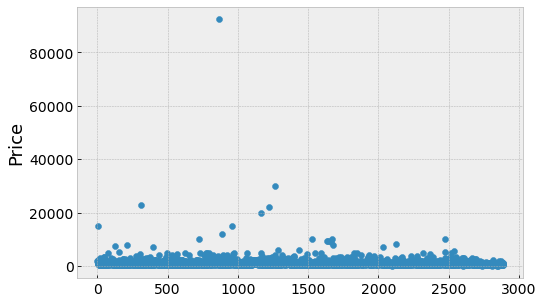

In [12]:
plt.figure(figsize=(8,5));

plt.scatter(np.arange(len(data)),data["price"])
plt.tick_params(labelsize=14);
plt.ylabel("Price",size=18);

The previous plot shows an obvious set of outleiers that we can remove first before we draw conclusions. To do that we calculate the standard deviation of the price coulumn and execlue any entry that has price lies beyond that limit. we do that as the dfollowing.

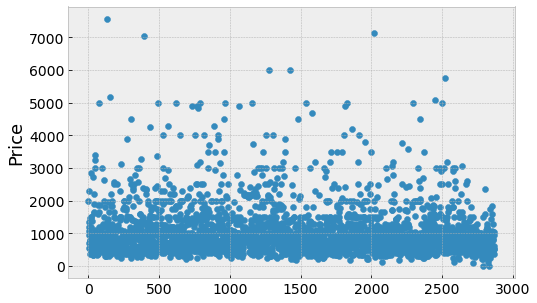

In [13]:
z_scores = stat.zscore(data["price"]);
abs_z_scores = np.abs(z_scores);
number_of_outleirs=sum(abs_z_scores > 3);

data = data[abs_z_scores < 3];
plt.figure(figsize=(8,5));

plt.scatter(np.arange(len(data)),data["price"]);
plt.tick_params(labelsize=14);
plt.ylabel("Price",size=18);

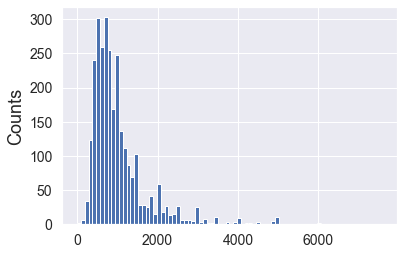

In [33]:

plt.hist(data["price"],bins=80);plt.tick_params(labelsize=14);
plt.ylabel("Counts",size=18);



The above plot looks better that our previous onw in term pf outliers. Next we can plot the average price per room type.

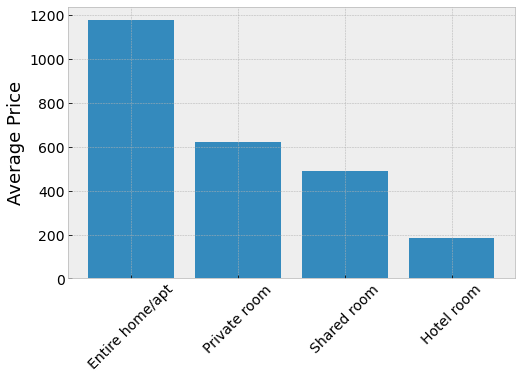

In [14]:
plt.figure(figsize=(8,5));

prices_mean_by_roomtype=pd.DataFrame(data.groupby(["room_type"]).mean()["price"])
prices_mean_by_roomtype=(prices_mean_by_roomtype.sort_values(by=['price'],ascending=False))
plt.bar(prices_mean_by_roomtype.index,prices_mean_by_roomtype["price"])
plt.tick_params(labelsize=14);
plt.ylabel("Average Price",size=18);
plt.xticks(rotation=45);


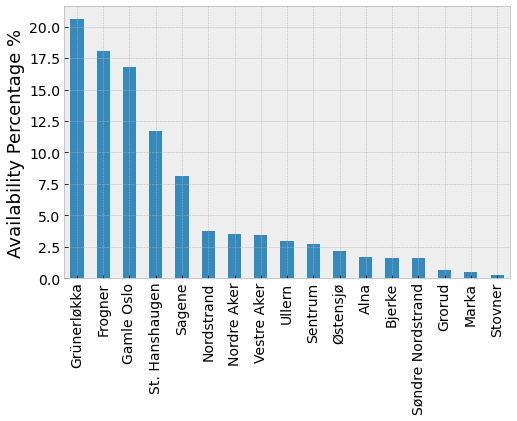

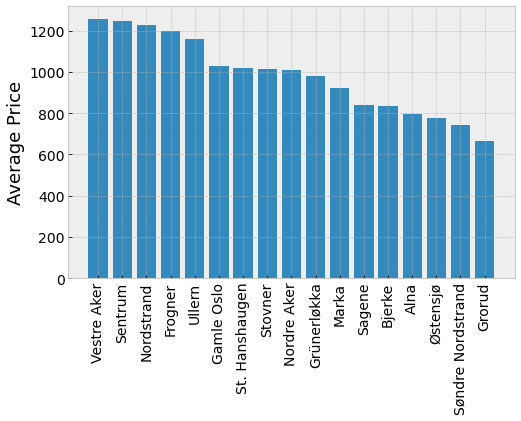

In [15]:
plt.figure(figsize=(8,5));
data_by_nh_counts=data["neighbourhood"].value_counts(sort=True,normalize=True)*100;
data_by_nh_counts.plot.bar(rot=0);
plt.xticks(rotation=90);
plt.tick_params(labelsize=14);
plt.ylabel("Availability Percentage %",size=18);


plt.figure(figsize=(8,5));

prices_mean_by_roomtype=pd.DataFrame(data.groupby(["neighbourhood"]).mean()["price"])
prices_mean_by_roomtype=(prices_mean_by_roomtype.sort_values(by=['price'],ascending=False))
plt.bar(prices_mean_by_roomtype.index,prices_mean_by_roomtype["price"])
plt.tick_params(labelsize=14);
plt.ylabel("Average Price",size=18);
plt.xticks(rotation=90);




We can also plot the number of listings under each room type, we plot the percentage in the following plot.

Room type percentages:
Entire home/apt    74.991292
Private room       23.894114
Shared room         0.940439
Hotel room          0.174155
Name: room_type, dtype: float64


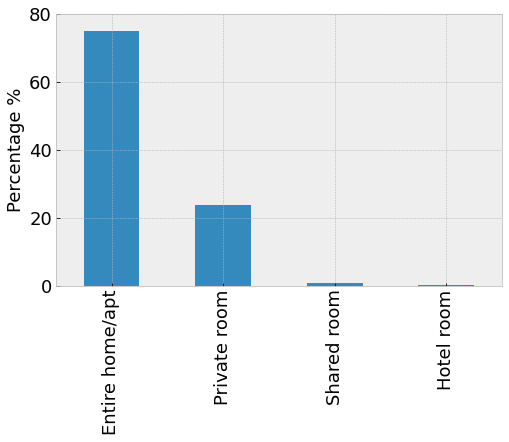

In [16]:
plt.figure(figsize=(8,5))
data_rooms=data["room_type"].value_counts(sort=True,normalize=True)*100
data_rooms.plot.bar(rot=0)
plt.xticks(rotation=90);
plt.tick_params(labelsize=18)
plt.ylabel("Percentage %",size=18);
plt.ylim(0,80)
print("Room type percentages:")
print(data_rooms)

Next we can encode the categorical columns, and cast them to integer.

In [17]:
for i,n in enumerate(nhoods["neighbourhood"]):
    data["neighbourhood"][data["neighbourhood"]==n]=i

for j,m in enumerate(r_types_set):
    data["room_type"][data["room_type"]==m]=j


cols = data.select_dtypes(exclude=['integer']).columns


data[cols] = data[cols].apply(pd.to_numeric, downcast='integer', errors="coerce")

print("Encoded dataframe types:")
print(data.dtypes)
print("----------------------------------")
print(data.head())

Encoded dataframe types:
id                int64
host_id           int64
neighbourhood      int8
room_type          int8
price             int64
minimum_nights    int64
dtype: object
----------------------------------
       id  host_id  neighbourhood  room_type  price  minimum_nights
0   42932   187463              2          3   1999               3
1   71725   368229              3          1    547               4
2   77108   412523              2          3   2299               7
3   92103   496205              5          3   1361               3
4  149776   714768             13          1    712               5


Then we can have a look to the correcelation between the dataframe columns.

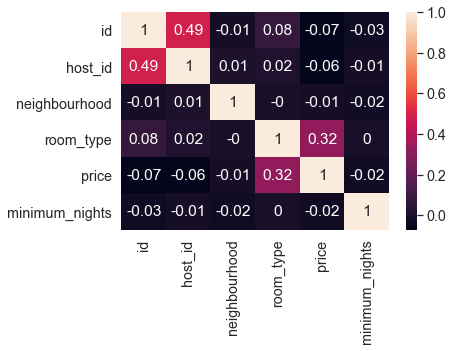

In [25]:
corrMatrix = np.round(data.corr(),2)
sb.heatmap(corrMatrix, annot=True)
sb.set(font_scale=1.3)
plt.show()v


Lastly we can Train a simple model of linear regreassion to predict a price of a new listing.

In [19]:
reg = LinearRegression(normalize=True)
X=np.array((data[["neighbourhood","room_type"]]))
y=np.array((data["price"]))
reg.fit(X, y)
reg.score(X, y)

0.10103930749180179

Now let us set a price of this list of listings.

In [20]:
prediction_df = pd.DataFrame({"neighbourhood": ["Frogner", "Østensjø", "Grünerløkka","Sagene","Frogner"], 
                   "room_type": ["Entire home/apt", "Entire home/apt", "Private room","Shared room","Shared room"]})

print(prediction_df)

  neighbourhood        room_type
0       Frogner  Entire home/apt
1      Østensjø  Entire home/apt
2   Grünerløkka     Private room
3        Sagene      Shared room
4       Frogner      Shared room


In [21]:
test_listigs=np.array(prediction_df)

for j,m in enumerate(r_types_set):
    test_listigs[test_listigs[:,1]==m,1]=j

for i,n in enumerate(nhoods["neighbourhood"]):
    test_listigs[test_listigs[:,0]==n,0]=i
    
test_listigs=test_listigs.astype(int)
print(test_listigs)

[[ 2  3]
 [ 9  3]
 [ 5  1]
 [10  0]
 [ 2  0]]


In [34]:
price_pred=reg.predict(test_listigs).astype(int)
prediction_df["price_pred"]=price_pred
print(prediction_df)

  neighbourhood        room_type  price_pred
0       Frogner  Entire home/apt        1184
1      Østensjø  Entire home/apt        1174
2   Grünerløkka     Private room         630
3        Sagene      Shared room         348
4       Frogner      Shared room         360
